In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys

sys.path.append('/Users/jameswallace/Desktop/SIF_MISCADA_PROJECT/SCOPE_simulations')

from FLD_methods import * # import the necessary FLD methods needed to convolute signals and retrieve SIF

In [3]:
kiwi_pathname = '/Users/jameswallace/Desktop/Project/data/red/s21_6562_E.csv'

In [9]:
kiwi_df = pd.read_csv(kiwi_pathname, index_col=0)
kiwi_df.head()

,y,x,1,2,3,4,5,6,7,8,...,440,441,442,443,444,445,446,447,448,449
0,5810314.655,440230.254,0.011269,0.033539,0.021515,0.022354,0.031113,0.027405,0.016739,0.021439,...,0.134033,0.094910,0.107239,0.114380,0.124695,0.128418,0.571777,1.319336,0.900391,0.701660
1,5810314.655,440231.254,0.011269,0.034424,0.018509,0.025543,0.031113,0.028168,0.016144,0.020447,...,0.098816,0.067871,0.063171,0.084839,0.090820,0.091980,0.560059,1.255859,0.880371,0.667969
2,5810313.655,440230.254,0.013870,0.035217,0.019989,0.024033,0.024368,0.026505,0.016739,0.020737,...,0.108887,0.077271,0.079285,0.095520,0.101501,0.109009,0.560059,1.255859,0.880371,0.696777
3,5810313.655,440231.254,0.012939,0.033539,0.019196,0.022995,0.023193,0.028076,0.016739,0.020447,...,0.078674,0.051453,0.057800,0.061218,0.087219,0.091980,0.541504,1.247070,0.880371,0.663086
4,5810313.655,440232.254,0.010994,0.030594,0.019196,0.022568,0.024017,0.026276,0.016342,0.018143,...,0.065247,0.047913,0.053497,0.047028,0.076538,0.065247,0.529785,1.209961,0.873535,0.639160


In [10]:
# drop x and y columns
# rename remaining columns to match instrument bands

In [15]:
kiwi_df = kiwi_df.drop(['y', 'x'], axis = 1)

In [18]:
# get bandnumbers

fenix_df = pd.read_csv('/Users/jameswallace/Desktop/Project/band_number_conversion.csv', index_col=0)

fenix_df.head()


,Wavelength,FWHM_2019,Unnamed: 3,Wavelength_2018,FWHM_2018,Unnamed: 6,Unnamed: 7
ID,,,,,,,
1,377.32,3.35,NaN,377.73,3.35,NaN,-0.41
2,380.67,3.35,NaN,381.09,3.35,NaN,-0.42
3,384.03,3.36,NaN,384.44,3.36,NaN,-0.41
4,387.39,3.36,NaN,387.80,3.36,NaN,-0.41
5,390.74,3.36,NaN,391.16,3.36,NaN,-0.42


In [19]:
kiwi_df.columns = fenix_df['Wavelength']

In [21]:
kiwi_df.head()

Wavelength,377.32,380.67,384.03,387.39,390.74,394.10,397.46,400.83,404.19,407.56,...,2448.16,2453.62,2459.08,2464.54,2470.00,2475.45,2480.91,2486.36,2491.81,2497.26
0,0.011269,0.033539,0.021515,0.022354,0.031113,0.027405,0.016739,0.021439,0.023087,0.025177,...,0.134033,0.094910,0.107239,0.114380,0.124695,0.128418,0.571777,1.319336,0.900391,0.701660
1,0.011269,0.034424,0.018509,0.025543,0.031113,0.028168,0.016144,0.020447,0.020493,0.022522,...,0.098816,0.067871,0.063171,0.084839,0.090820,0.091980,0.560059,1.255859,0.880371,0.667969
2,0.013870,0.035217,0.019989,0.024033,0.024368,0.026505,0.016739,0.020737,0.023087,0.022919,...,0.108887,0.077271,0.079285,0.095520,0.101501,0.109009,0.560059,1.255859,0.880371,0.696777
3,0.012939,0.033539,0.019196,0.022995,0.023193,0.028076,0.016739,0.020447,0.021088,0.020264,...,0.078674,0.051453,0.057800,0.061218,0.087219,0.091980,0.541504,1.247070,0.880371,0.663086
4,0.010994,0.030594,0.019196,0.022568,0.024017,0.026276,0.016342,0.018143,0.019882,0.020264,...,0.065247,0.047913,0.053497,0.047028,0.076538,0.065247,0.529785,1.209961,0.873535,0.639160


In [26]:
# now get an array of average values

rapp_averages = kiwi_df.mean()
r_app_std = kiwi_df.std()

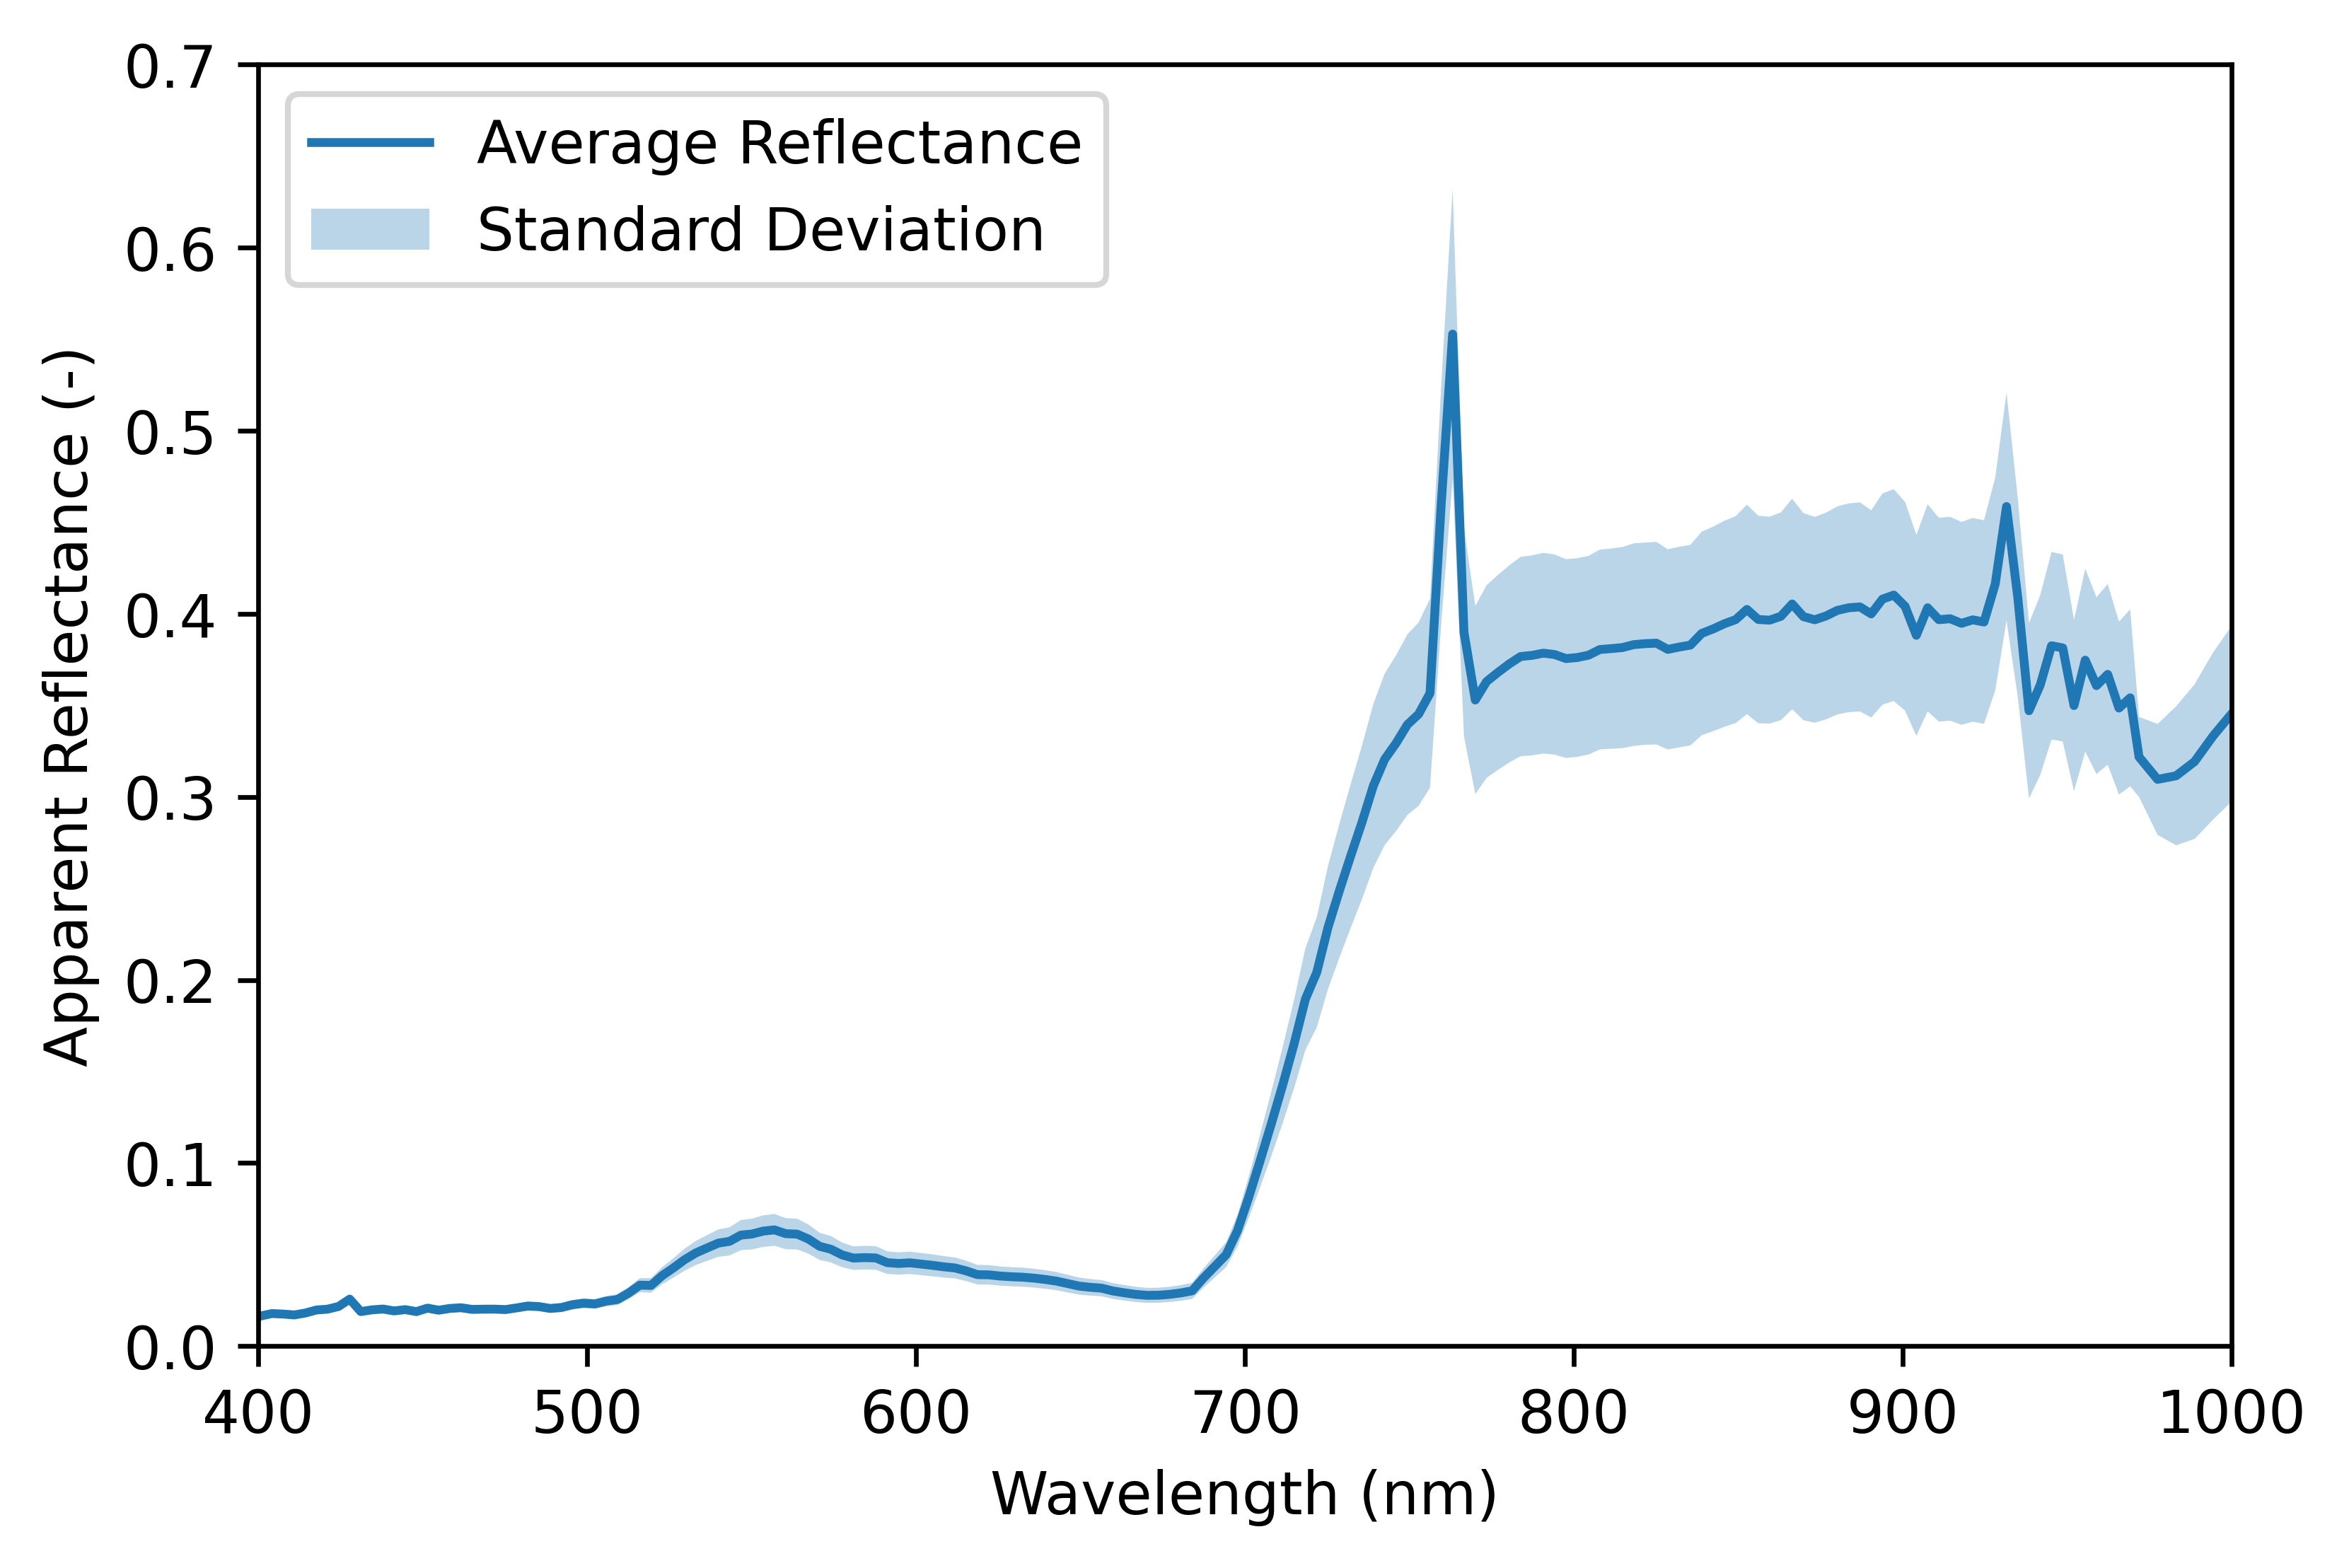

In [49]:
plt.figure(figsize=(6, 4), dpi = 600)
plt.xlim(400, 1000)
plt.ylim(0, 0.7)
plt.fill_between(np.asarray(fenix_df['Wavelength']), np.asarray(rapp_averages) - np.asarray(r_app_std), np.asarray(rapp_averages) + np.asarray(r_app_std), alpha = 0.3, label = 'Standard Deviation')
plt.plot(np.asarray(fenix_df['Wavelength']), np.asarray(rapp_averages), label = 'Average Reflectance')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Apparent Reflectance (-)')
plt.legend(loc = 'upper left')